In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import time
bridge_file = open('./Bridge.txt','r')
YT_API_KEY = bridge_file.read()
bridge_file.close()

In [2]:
data = pd.read_csv('./dataset/yt.csv', low_memory=False)
temp_data = data

In [3]:
data

date              updated     type  \
0       2021-09-01 18:50:56  2021-10-07 23:44:11  youtube   
1       2021-09-01 18:49:19  2021-10-03 17:29:06  youtube   
2       2021-09-01 18:44:22  2022-02-07 02:20:43  youtube   
3       2021-09-01 18:43:07  2021-09-07 11:29:00  youtube   
4       2021-09-01 18:42:44  2021-09-07 10:31:58  youtube   
...                     ...                  ...      ...   
986206  2022-02-24 03:25:23  2022-03-10 19:47:35  youtube   
986207  2022-02-24 03:25:21  2022-03-10 23:02:18    video   
986208  2022-02-24 03:25:11  2022-02-28 13:44:36  youtube   
986209  2022-02-24 03:24:48  2022-03-11 09:09:34  youtube   
986210  2022-02-24 03:24:45  2022-02-26 17:52:49  youtube   

                                              description  \
0       "Буковина" припиняє боротьбу у Кубку України. ...   
1       Зустріч у США президентів Джо Байдена і Володи...   
2       #"Говорить! Не надо бояться!" «Платформа» Андр...   
3       Сьогодні в гостях у @СЕРГІЙ ЛЕЩЕНКО Валерій Ча...   
4       БЕСПРЕДЕЛ! Зеленский оф*гел! Социальный взрыв ...   
...                                                   ...   
986206  #игрянулгрэм #обращениепутина #днр #лнр #украи...   
986207  МОНСТРЫ ОКУНЯ В КИЕВЕ | Подводная Охота | П.О ...   
986208  Красномовні заяви про зад Путіна і нова хвиля ...   
986209  Ukraine President Volodymyr Zelenskyy (Puppet ...   
986210  Красномовні заяви про зад Путіна і нова хвиля ...   

                                                  message  \
0       Драма у матчі БУКОВИНА - ПРИКАРПАТТЯ / пенальт...   
1                                                     NaN   
2                                       Смешно и серьезно   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
986206                                             Война?   
986207  Время летит как вода: работа, дом, семейный бы...   
986208                                                NaN   
986209                                                NaN   
986210                                                NaN   

                                            expandedLinks  \
0       [{'original': 'https://youtu.be/IJeEczs3cVY', ...   
1       [{'original': 'https://youtube.com/watch?v=I1H...   
2       [{'original': 'https://platforma-karaulov.ru/'...   
3       [{'original': 'https://youtube.com/watch?v=ndg...   
4       [{'original': 'https://t.me/politman_ua', 'exp...   
...                                                   ...   
986206  [{'original': 'https://youtube.com/watch?v=oAT...   
986207  [{'original': 'https://youtu.be/5G_QI6iUS9Q', ...   
986208  [{'original': 'https://www.youtube.com/watch?v...   
986209  [{'original': 'https://youtube.com/watch?v=eR3...   
986210  [{'original': 'https://www.youtube.com/watch?v...   

                                                     link  \
0                            https://youtu.be/IJeEczs3cVY   
1       https://youtube.com/watch?v=I1HSUGKLH0E&featur...   
2             https://www.youtube.com/watch?v=fzVS23qZa2c   
3       https://youtube.com/watch?v=ndgMddeuT1M&featur...   
4       https://youtube.com/watch?v=sQJP8aoTo50&featur...   
...                                                   ...   
986206  https://youtube.com/watch?v=oATvY1smXf8&featur...   
986207                       https://youtu.be/5G_QI6iUS9Q   
986208        https://www.youtube.com/watch?v=Im2s8uf76hc   
986209  https://youtube.com/watch?v=eR3UCOVGb_I&featur...   
986210        https://www.youtube.com/watch?v=Im2s8uf76hc   

                                                  postUrl  subscriberCount  \
0       https://www.facebook.com/749375571844814/posts...           4019.0   
1       https://www.facebook.com/groups/48597114874267...           1405.0   
2       https://www.facebook.com/groups/10703492163725...           8347.0   
3       https://www.facebook.com/groups/229033

In [ ]:
data.describe()

In [ ]:
data.nunique()

In [ ]:
data['pageAdminTopCountry'].unique()

In [ ]:
data['accountType'].unique()

In [ ]:
data.isnull().sum()

In [6]:
data.shape

(986211, 32)

In [ ]:
v_count = 0
amp_count = 0
for link in  data['link']:
    #v_ind = link.indexOf('v=')
    #amp_ind = link.indexOf('&')
    if 'v=' in link:
        v_count = v_count+1
    if '&' in link:
        amp_count = amp_count+1
        print(link)
print(v_count, amp_count, data.shape[0])

In [25]:
#Retrieving video ids

In [9]:
data = temp_data
print(temp_data)

In [4]:
videoIds = []
str = ""
for link in data['link']:
    if 'youtube.com' in link:
        v_index = link.find('v=')
        amp_index = link.find('&')
        if v_index != -1:
            if amp_index != -1:
                stri = link[v_index+2:amp_index]
                if len(stri) == 11:
                    videoIds.append(stri)
                else:
                    videoIds.append('NA')
            else:
                stri = link[v_index+2:v_index+13]
                if len(stri) == 11:
                    videoIds.append(stri)
                else:
                    videoIds.append('NA')
        else:
            videoIds.append('NA')
    elif 'youtu.be' in link:
        be_index = link.find('.be/')
        if be_index != -1 and be_index+4 < len(link):
            stri = link[be_index+4:be_index+15]
            #print(stri)
            if len(stri) == 11:
                videoIds.append(stri)
            else:
                videoIds.append('NA')
        else:
            videoIds.append('NA')
    else:
        videoIds.append('NA')

data.insert(1, "videoIds",videoIds)
#yt_data = pd.DataFrame(videoIds, columns=['videoIds'])

print(len(data['videoIds']))

986211


In [5]:
data

date     videoIds              updated     type  \
0       2021-09-01 18:50:56  IJeEczs3cVY  2021-10-07 23:44:11  youtube   
1       2021-09-01 18:49:19  I1HSUGKLH0E  2021-10-03 17:29:06  youtube   
2       2021-09-01 18:44:22  fzVS23qZa2c  2022-02-07 02:20:43  youtube   
3       2021-09-01 18:43:07  ndgMddeuT1M  2021-09-07 11:29:00  youtube   
4       2021-09-01 18:42:44  sQJP8aoTo50  2021-09-07 10:31:58  youtube   
...                     ...          ...                  ...      ...   
986206  2022-02-24 03:25:23  oATvY1smXf8  2022-03-10 19:47:35  youtube   
986207  2022-02-24 03:25:21  5G_QI6iUS9Q  2022-03-10 23:02:18    video   
986208  2022-02-24 03:25:11  Im2s8uf76hc  2022-02-28 13:44:36  youtube   
986209  2022-02-24 03:24:48  eR3UCOVGb_I  2022-03-11 09:09:34  youtube   
986210  2022-02-24 03:24:45  Im2s8uf76hc  2022-02-26 17:52:49  youtube   

                                              description  \
0       "Буковина" припиняє боротьбу у Кубку України. ...   
1       Зустріч у США президентів Джо Байдена і Володи...   
2       #"Говорить! Не надо бояться!" «Платформа» Андр...   
3       Сьогодні в гостях у @СЕРГІЙ ЛЕЩЕНКО Валерій Ча...   
4       БЕСПРЕДЕЛ! Зеленский оф*гел! Социальный взрыв ...   
...                                                   ...   
986206  #игрянулгрэм #обращениепутина #днр #лнр #украи...   
986207  МОНСТРЫ ОКУНЯ В КИЕВЕ | Подводная Охота | П.О ...   
986208  Красномовні заяви про зад Путіна і нова хвиля ...   
986209  Ukraine President Volodymyr Zelenskyy (Puppet ...   
986210  Красномовні заяви про зад Путіна і нова хвиля ...   

                                                  message  \
0       Драма у матчі БУКОВИНА - ПРИКАРПАТТЯ / пенальт...   
1                                                     NaN   
2                                       Смешно и серьезно   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
986206                                             Война?   
986207  Время летит как вода: работа, дом, семейный бы...   
986208                                                NaN   
986209                                                NaN   
986210                                                NaN   

                                            expandedLinks  \
0       [{'original': 'https://youtu.be/IJeEczs3cVY', ...   
1       [{'original': 'https://youtube.com/watch?v=I1H...   
2       [{'original': 'https://platforma-karaulov.ru/'...   
3       [{'original': 'https://youtube.com/watch?v=ndg...   
4       [{'original': 'https://t.me/politman_ua', 'exp...   
...                                                   ...   
986206  [{'original': 'https://youtube.com/watch?v=oAT...   
986207  [{'original': 'https://youtu.be/5G_QI6iUS9Q', ...   
986208  [{'original': 'https://www.youtube.com/watch?v...   
986209  [{'original': 'https://youtube.com/watch?v=eR3...   
986210  [{'original': 'https://www.youtube.com/watch?v...   

                                                     link  \
0                            https://youtu.be/IJeEczs3cVY   
1       https://youtube.com/watch?v=I1HSUGKLH0E&featur...   
2             https://www.youtube.com/watch?v=fzVS23qZa2c   
3       https://youtube.com/watch?v=ndgMddeuT1M&featur...   
4       https://youtube.com/watch?v=sQJP8aoTo50&featur...   
...                                                   ...   
986206  https://youtube.com/watch?v=oATvY1smXf8&featur...   
986207                       https://youtu.be/5G_QI6iUS9Q   
986208        https://www.youtube.com/watch?v=Im2s8uf76hc   
986209  https://youtube.com/watch?v=eR3UCOVGb_I&featur...   
986210        https://www.youtube.com/watch?v=Im2s8uf76hc   

                                                  postUrl  subscriberCount  \
0       https://www.facebook.com/749375571844814/posts...           4019.0   
1       https://www.facebook.com/groups/485971

In [7]:
#sorting the video ids based on their number of occurence

In [ ]:
sorted_vid_list = data['videoIds'].value_counts().index.tolist()
sorted_vid_list.remove('NA')
sorted_vid_list

In [ ]:
#Taking the top 50 most common videos from the dataset for the analysis

In [7]:
nums_video = int(input('How many videos to take for analysis? '))

How many videos to take for analysis? 10000


In [8]:
sorted_data = {'videoIds': sorted_vid_list[0:nums_video],
   'count': data['videoIds'].value_counts().tolist()[0:nums_video]
}
yt_data = pd.DataFrame(sorted_data)
print(yt_data)

         videoIds  count
0     saEpkcVi1d4  15423
1     JrMiSQAGOS4   2420
2     hSJKaeMHSOU   1005
3     6ohMKNthCqA    588
4     JaLerV_NtMs    588
...           ...    ...
9995  Lpa3cbVSQzE     17
9996  8AYxyPF4Vos     17
9997  HIfOQ2yNfKo     17
9998  Ob9YXUe6GdM     17
9999  zmLYncF3V2g     17

[10000 rows x 2 columns]


In [60]:
#Preparing a comma separated list of video ids for youtube data api

In [9]:
n_cs_vids = int(nums_video/50)
sorted_index = 0
sorted_videoIds = yt_data['videoIds'].tolist()
cs_videoids = ''
cs_vid_list = []
for ind in range(0,n_cs_vids):
    for s_ind in range(sorted_index,sorted_index+50):
        cs_videoids = cs_videoids+','+sorted_videoIds[s_ind]
    cs_vid_list.append(cs_videoids[1:])
    cs_videoids = ''
    sorted_index = sorted_index+50
if nums_video % 50 != 0:
    diff = nums_video - (50*n_cs_vids)
    for s_ind in range(sorted_index,sorted_index+diff):
        cs_videoids = cs_videoids+','+sorted_videoIds[s_ind]
    cs_vid_list.append(cs_videoids[1:])
    cs_videoids = ''
    sorted_index = sorted_index+diff
print(sorted_index,len(cs_vid_list))    

10000 200


In [48]:
#Fetching data about the top n videos from YouTube Data API

In [10]:
response_from = requests.get(f'https://youtube.googleapis.com/youtube/v3/videos?part=snippet%2CcontentDetails%2Cstatistics&id={cs_vid_list[0]}&key={YT_API_KEY}')
json_data = json.loads(response_from.text)
for x in range(1,len(cs_vid_list)):
    response2_from = requests.get(f'https://youtube.googleapis.com/youtube/v3/videos?part=snippet%2CcontentDetails%2Cstatistics&id={cs_vid_list[x]}&key={YT_API_KEY}')
        #time.sleep(7)
    json_data_2 = json.loads(response2_from.text)
        #print(json_data_2)
    json_data['items'] = [*json_data['items'],*json_data_2['items']]
print(len(json_data['items']))

7757


In [62]:
#Fetching select objects required for analysis of the videos

In [16]:
v_channelId = []
v_channelTitle = []
v_tags=[]
v_views=[]
v_likes=[]
v_title=[]
v_lang = []
v_description=[]
v_publish_date=[]
v_comments=[]
v_videoTime = []
v_visited = []
for x in range(0,len(sorted_videoIds)):
    v_visited.insert(x,0)
data_list = json_data['items']
for item in data_list:
    if item['id'] in sorted_videoIds:
        v_index = sorted_videoIds.index(item['id'])
        v_visited[v_index]=1
        if 'channelTitle' in item['snippet']:
            v_channelTitle.insert(v_index, item['snippet']['channelTitle'])
        else:
            v_channelTitle.insert(v_index, 'NA')
        if 'channelId' in item['snippet']:
            v_channelId.insert(v_index, item['snippet']['channelId'])
        else:
            v_channelId.insert(v_index, 'NA')
        if 'tags' in item['snippet']:
            v_tags.insert(v_index,item['snippet']['tags'])
        else:
            v_tags.insert(v_index, ['NA'])
        if 'defaultLanguage' in item['snippet']:
            v_lang.insert(v_index,item['snippet']['defaultLanguage'][0:2])
        else:
            v_lang.insert(v_index, 'NA')
        if 'duration' in item['contentDetails']:
            #print(item['id'])
            v_videoTime.insert(v_index,convert_time_to_sec(item['contentDetails']['duration']))
        else:
            v_videoTime.insert(v_index,0)
        if 'viewCount' in item['statistics']:
            v_views.insert(v_index,int(item['statistics']['viewCount']))
        else:
            v_views.insert(v_index, 0)
        if 'likeCount' in item['statistics']:
            v_likes.insert(v_index,int(item['statistics']['likeCount']))
        else:
            v_likes.insert(v_index, 0)
        if 'commentCount' in item['statistics']:
            v_comments.insert(v_index,int(item['statistics']['commentCount']))
        else:
            v_comments.insert(v_index, 0)
        if 'title' in item['snippet']:
            v_title.insert(v_index,item['snippet']['title'])
        else:
            v_title.insert(v_index, 'NA')
        if 'description' in item['snippet']:
            v_description.insert(v_index,item['snippet']['description'])
        else:
            v_description.insert(v_index, 'NA')
        if 'publishedAt' in item['snippet']:
            v_publish_date.insert(v_index,item['snippet']['publishedAt'])
        else:
            v_publish_date.insert(v_index, 'NA')

for x in range(0,len(sorted_videoIds)):
    if v_visited[x] == 0:
        v_channelId.insert(x,'NA')
        v_channelTitle.insert(x, 'NA')
        v_tags.insert(x,['NA'])
        v_lang.insert(x,'NA')
        v_videoTime.insert(x,0)
        v_views.insert(x,0)
        v_likes.insert(x,0),
        v_comments.insert(x,0),
        v_title.insert(x,'NA')
        v_description.insert(x,'NA')
        v_publish_date.insert(x,'NA')

yt_data = yt_data.assign(channelId=v_channelId,
                         channelTitle=v_channelTitle,
                         videoTime=v_videoTime,
                        videoTags=v_tags,
                        videoLanguage=v_lang,
                        videoViews=v_views,
                        videoLikes=v_likes,
                        videoComments=v_comments,
                        videoTitle=v_title,
                        videoDescription=v_description,
                        videoPublishedAt=v_publish_date)
yt_data

videoIds  count                 channelId  \
0     saEpkcVi1d4  15423  UCY2qt3dw2TQJxvBrDiYGHdQ   
1     JrMiSQAGOS4   2420  UCGINcKuFbysZAslgL46KeOA   
2     hSJKaeMHSOU   1005  UC9OulSs0GSZY0KeFSJHl0ZA   
3     6ohMKNthCqA    588  UCbmVlqWD6lqn1Ur1Zv25IIg   
4     JaLerV_NtMs    588  UCJCqfFNeovaIr6IA-EynY1Q   
...           ...    ...                       ...   
9995  Lpa3cbVSQzE     17  UCCcprrrcbdaj14kYPjcbj9w   
9996  8AYxyPF4Vos     17  UCOBMhI7TtRLTAGpcTjNvYCw   
9997  HIfOQ2yNfKo     17  UCG_Qif8SJIS3XxU8iqHoInw   
9998  Ob9YXUe6GdM     17  UCDRIjKy6eZOvKtOELtTdeUA   
9999  zmLYncF3V2g     17                        NA   

                         channelTitle  videoTime  \
0                          Pink Floyd        234   
1           The University of Chicago       4456   
2                         Lay Zing 🇷🇼        374   
3                       Gustavo Gayer        506   
4                       Pinky Guanzon        622   
...                               ...        ...   
9995               В гостях у Гордона       1711   
9996                    Afrique Média       4767   
9997  Radio Free Europe/Radio Liberty        109   
9998                  Breaking Points        493   
9999                               NA          0   

                                              videoTags videoLanguage  \
0                                                  [NA]            en   
1     [mearsheimer ukraine, john mearsheimer ukraine...            NA   
2     [Russia Ukraine intambara, intambararussiaukra...            NA   
3     [Gayer, gustavo, papo conservador, papo, conse...            NA   
4     [kumita ng pera sa tiktok, kumita ng pera gami...            en   
...                                                 ...           ...   
9995  [Dmitry Gordon (Person), Дмитрий Гордон, Гордо...            NA   
9996  [afrique media, banda, kani, panafricanisme, c...            NA   
9997        [Khrakiv, Russia, Ukraine, civilian deaths]            NA   
9998  [krystal and saagar breaking points, krystal b...            NA   
9999                                               [NA]            NA   

      videoViews  videoLikes  videoComments  \
0       10779448      452191          29995   
1       27767794      260978          14780   
2           4281          54              7   
3         701521      134967          10341   
4           2873           0            108   
...          ...         ...            ...   
9995     1287740       45066           4141   
9996       38963         536            103   
9997     1202699       16260           5854   
9998      102086        7432           1097   
9999           0           0              0   

                                             videoTitle  \
0     Pink Floyd - Hey Hey Rise Up (feat. Andriy Khl...   
1     Why is Ukraine the West's Fault? Featuring Joh...   
2     Noneho Ukraine igiye kwihorera igitwaro cya ki...   
3     Ucraniana fala a verdade sobre Zelensky na TV ...   
4     EARN FREE 100 GCASH MONEY|ARAW ARAW MAY PERA K...   
...                                                 ...   
9995  Кикабидзе. Умерший Путин, деморализованная Рос...   
9996  LA RUSSIE EST ELLE ENTRAIN DE PRENDRE EN MAIN ...   
9997  Dozens Of Civilian Deaths Reported In Kharkiv ...   
9998  Krystal Ball: How Media MANUFACTURES CONSENT o...   
9999                                                 NA   

                                       videoDescription      videoPublishedAt  
0     ‎Here is the official video for 'Hey Hey Rise ...  2022-04-07T18:30:10Z  
1     UnCommon Core: The Causes and Consequences of ...  2015-09-25T17:37:34Z  
2     intambara yakajije umurego abarussia ntibashak...  2022-03-01T09:32:17Z  
3     Para ajudar a resgatar um jornalismo sério, as...  2022-03-02T20:12:41Z  
4     EARN FREE 100 GCASH MONEY|ARAW ARAW MAY PERA K...  2021-10-25T01:37:52Z  
...                                                 ...                   ...  
9995  Интервью Дмитрия Г

In [74]:
#Saving the dataframe as dataset so that we don't have to call the API again during analysis

In [118]:
yt_data.to_csv(f'./dataset/top_{nums_video}_yt_video.csv')

In [101]:
yt_data = pd.read_csv('./dataset/top_1000_yt_video.csv')

In [94]:
#Extracting channelIDs to extract data about the YT channels next and creating a separate DataFrame

In [ ]:
sorted_channels = yt_data['channelId'].value_counts().index.tolist()
while 'NA' in sorted_channels:
    sorted_channels.remove('NA')
print(sorted_channels)
yt_channel_data = pd.DataFrame(sorted_channels, columns=['channelIds'])
print(yt_channel_data)

In [18]:
n_cs_cids = int(len(sorted_channels)/50)
sorted_index_c = 0
sorted_channelIds = yt_channel_data['channelIds'].tolist()
cs_channelids = ''
cs_cid_list = []
if n_cs_cids == 0:
    for s_ind in range(0,len(sorted_channels)):
        cs_channelids = cs_channelids+','+sorted_channelIds[s_ind]
    cs_cid_list.append(cs_channelids[1:])
    cs_channelids = ''
    sorted_index_c = sorted_index_c+len(sorted_channels)
for ind in range(0,n_cs_cids):
    for s_ind in range(sorted_index_c,sorted_index_c+50):
        cs_channelids = cs_channelids+','+sorted_channelIds[s_ind]
    cs_cid_list.append(cs_channelids[1:])
    cs_channelids = ''
    sorted_index_c = sorted_index_c+50
if n_cs_cids != 0 and len(sorted_channels) % 50 != 0:
    diff = len(sorted_channels) - (50*n_cs_cids)
    for s_ind in range(sorted_index_c,sorted_index_c+diff):
        cs_channelids = cs_channelids+','+sorted_channelIds[s_ind]
    cs_cid_list.append(cs_channelids[1:])
    cs_channelids = ''
    sorted_index_c = sorted_index_c+diff
print(sorted_index_c,len(cs_cid_list), cs_channelids) 

2970 60 


In [19]:
response_from = requests.get(f'https://youtube.googleapis.com/youtube/v3/channels?part=snippet%2CcontentDetails%2Cstatistics&id={cs_cid_list[0]}&key={YT_API_KEY}')
channel_json_data = json.loads(response_from.text)
for x in range(1,len(cs_cid_list)):
    response2_from = requests.get(f'https://youtube.googleapis.com/youtube/v3/channels?part=snippet%2CcontentDetails%2Cstatistics&id={cs_cid_list[x]}&key={YT_API_KEY}')
        #time.sleep(7)
    channel_json_data_2 = json.loads(response2_from.text)
        #print(json_data_2)
    channel_json_data['items'] = [*channel_json_data['items'],*channel_json_data_2['items']]
print(len(channel_json_data['items']))

2970


In [103]:
#Fetching select objects required for analysis of the videos

In [21]:
vc_channelTitle = []
vc_subs=[]
vc_views=[]
vc_vidcnt=[]
vc_cntry=[]
vc_description=[]
vc_publish_date=[]
vc_visited = []
api_resp_cid = []
channel_data_list = channel_json_data['items']
sorted_channelIds = yt_channel_data['channelIds'].tolist()
#print(sorted_channelIds)
for x in range(0,len(channel_data_list)):
    vc_visited.append(0)
for item in channel_data_list:
    api_resp_cid.append(item['id'])
for idx,cId in enumerate(sorted_channelIds):
    if cId in api_resp_cid:
        vc_index = api_resp_cid.index(cId)
        vc_visited[idx]=1
        item = channel_json_data['items'][vc_index]
        if 'title' in item['snippet']:
            vc_channelTitle.append(item['snippet']['title'])
        else:
            vc_channelTitle.append('NA')
        if 'subscriberCount' in item['statistics']:
            vc_subs.append(int(item['statistics']['subscriberCount']))
        else:
            vc_subs.append(0)
        if 'viewCount' in item['statistics']:
            vc_views.append(int(item['statistics']['viewCount']))
        else:
            vc_views.append(0)
        if 'videoCount' in item['statistics']:
            vc_vidcnt.append(int(item['statistics']['videoCount']))
        else:
            vc_vidcnt.append(0)
        if 'country' in item['snippet']:
            vc_cntry.append(item['snippet']['country'])
        else:
            vc_cntry.append('NA')
        if 'description' in item['snippet']:
            vc_description.append(item['snippet']['description'])
        else:
            vc_description.append('NA')
        if 'publishedAt' in item['snippet']:
            vc_publish_date.append(item['snippet']['publishedAt'])
        else:
            vc_publish_date.append('NA')
for x in range(0,len(channel_data_list)):
    if vc_visited[x] == 0:
        vc_channelTitle.insert(x, 'NA')
        vc_subs.insert(x,0)
        vc_views.insert(x,0)
        vc_vidcnt.insert(x,0)
        vc_cntry.insert(x,'NA')
        vc_description.insert(x,'NA')
        vc_publish_date.insert(x,'NA')
yt_channel_data = yt_channel_data.assign(channelTitle=vc_channelTitle,
                        subscribers=vc_subs,
                        channelViews=vc_views,
                        videoCount=vc_vidcnt,
                        channelCountry=vc_cntry,
                        channelDescription=vc_description,
                        channelPublishedAt=vc_publish_date)
yt_channel_data

channelIds                    channelTitle  subscribers  \
0     UCb2oej0JtxlnywlqoSiHHVQ  Юрий Швец -- официальный канал      1120000   
1     UCH9H_b9oJtSHBovh94yB5HA                Телеканал Прямий      1730000   
2     UCsT4NSardFSUa0bokXXI6Fg    Prensa Alternativa - El Jota       560000   
3     UCnbuCp4py12SNWCc5TI1RHA                 Denis Kazanskyi       470000   
4     UC7FEBULCrgaFxH05t6mYeHA                 Тарас Березовец       553000   
...                        ...                             ...          ...   
2965  UCBxW6DP4miw3NnMjtLrE0Dw                     Kim Clement       284000   
2966  UC5g8VCeTpLCJwOFtsPJNBvA                   MURYAR AFRICA          766   
2967  UC3EIJbXyvElq7ZZuVhMt8AA                   Djiman Manima         7390   
2968  UCmTv8liAqN9St2MhEntGMlg            alternativetentacles        37100   
2969  UCeBbcl30OG07zFzkGJJA82g                       Sarah5 Tv         4920   

      channelViews  videoCount channelCountry  \
0        250721818         344             US   
1       1280745144       67394             UA   
2        239084409        7770             PE   
3        162929644        1735             UA   
4        129654100         750             PL   
...            ...         ...            ...   
2965             0         717             US   
2966         29626         254             NG   
2967        432402         150             ID   
2968       2398940         166             NA   
2969        142182         109             PH   

                                     channelDescription  \
0     Юрий Швец – официальный канал бывшего разведчи...   
1     Ми — люди медіа. Це наше життя. Наші радощі .....   
2     Análisis Geopolítico desde la mirada de la Pat...   
3     Видеоблог Дениса Казанского, путевые заметки, ...   
4     Коротко о самых важных и значимых событиях в У...   
...                                                 ...   
2965  Welcome to the OFFICIAL Kim Clement  Youtube C...   
2966     BARKA DA ZUWA TASHAR                       ...   
2967        Musik mampu mendamaikan hati yang memanas..   
2968  Alternative Tentacles began in 1979 releasing ...   
2969           Mahalin mo ang taong nagpapahalaga sayo.   

               channelPublishedAt  
0     2021-05-27T17:48:25.403654Z  
1            2017-04-14T13:38:01Z  
2            2009-08-14T03:13:08Z  
3            2009-11-20T06:58:49Z  
4            2012-12-13T15:22:52Z  
...                           ...  
2965         2010-11-30T15:58:32Z  
2966  2021-10-13T09:27:51.718126Z  
2967         2012-06-27T07:16:34Z  
2968         2006-01-11T03:29:33Z  
2969  2020-11-16T06:31:04.431096Z  

[2970 rows x 8 columns]

In [ ]:
yt_data

In [92]:
#How many viewers like to see content in such topics/tags? (as no of likes and likes proportion)

In [12]:
def convert_time_to_sec(time_str):
    #PT1H15M44S
    total_seconds = 0
    
    if 'DT' in time_str:
        time_str = time_str[1:]
        index = time_str.index('DT')
        day_time = int(time_str[0:index])
        total_seconds = day_time*86400
        time_str = time_str[index+2:]
    else:
        time_str = time_str[2:]
    if 'H' in time_str:
        index = time_str.index('H')
        hour_time = int(time_str[0:index])
        total_seconds = total_seconds+(hour_time*3600)
        time_str = time_str[index+1:]
        #print(hour_time)
        #print(time_str)
    if 'M' in time_str:
        index = time_str.index('M')
        min_time = int(time_str[0:index])
        total_seconds = total_seconds+(min_time*60)
        time_str = time_str[index+1:]
        #print(time_str)
        #print(min_time)
    if 'S' in time_str:
        index = time_str.index('S')
        sec_time = int(time_str[0:index])
        total_seconds = total_seconds+sec_time
        #print(sec_time)
    return total_seconds
        #print(time_str)
print(convert_time_to_sec('PT24H60M60S'))

90060


In [13]:
def removeAllSplChars(word):
    word = word.strip()
    spl_characters = ['!','#','$','%','&','(',')','*','+','-','.','/',':',';','<','=','>','?','@','[',']','_','{','}']
    for chars in spl_characters:
        word = word.replace(chars,'')
    return word

In [14]:
def plot_the_list(x_list, y_list, bar_color,x_label, y_label, graph_title):
    fig = plt.figure(figsize = (20, 10))
    plt.bar(x_list, y_list, color=bar_color,width = 0.5)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(graph_title)
    plt.show()

In [15]:
def make_a_list(sorted_entities):
    max_results = int(input('How many results you want in graph? '))
    key_list = []
    val_list = []
    if len(sorted_entities) > max_results:
        for x in range(0,max_results):
            key_list.append(sorted_entities[x][0])
            val_list.append(sorted_entities[x][1])
    else:
        for x in range(0,len(sorted_entities)):
            key_list.append(sorted_entities[x][0])
            val_list.append(sorted_entities[x][1])
    #print(key_list, val_list)
    return key_list, val_list

Most viewers liked to see `ukraine` with a likes proportion of 1.14%
How many results you want in graph? 10


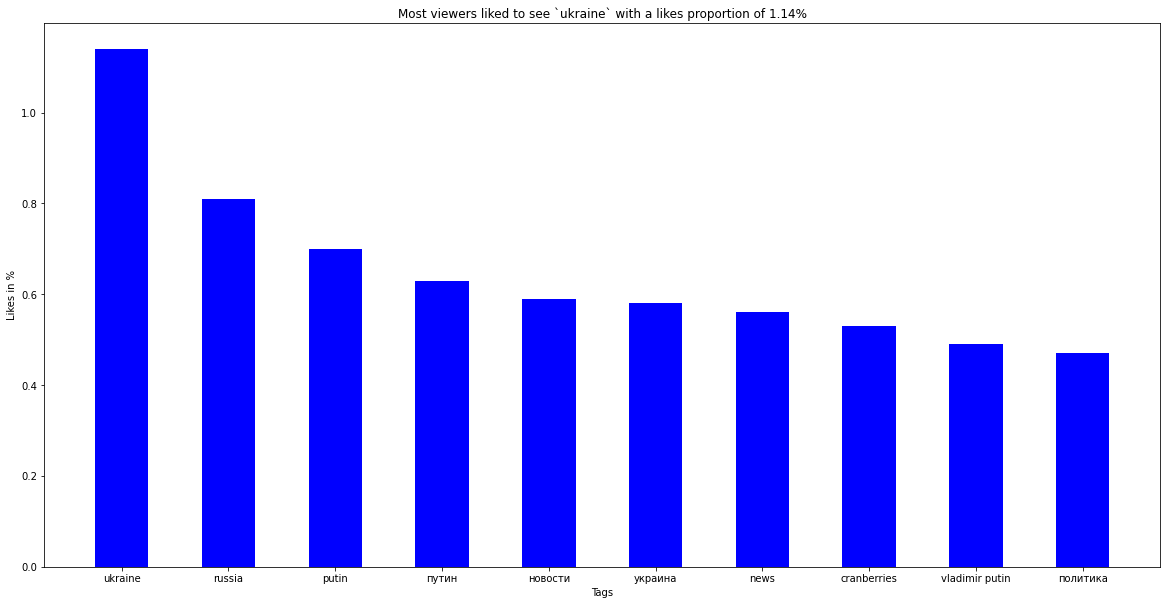

In [22]:
tag_list = []
tag_likes = []
total_likes = 0
max_likes = 0
max_likes_tag = -1
tag_dict_likes = {}
tag_likes_dist = {}
for idx,tags_list in enumerate(yt_data['videoTags']):    
    if tags_list[0] != 'NA':
        for tag in tags_list:
            tag = removeAllSplChars(tag)
            tag = tag.lower()
            if tag in tag_dict_likes:
                tag_dict_likes[tag] = tag_dict_likes[tag]+yt_data['videoLikes'][idx]
            else:
                tag_dict_likes[tag] = yt_data['videoLikes'][idx]
            total_likes = total_likes + yt_data['videoLikes'][idx]
#print(tag_dict_likes)
for tag in tag_dict_likes:
    tag_likes_dist[tag] = round((tag_dict_likes[tag]/total_likes)*100, 2)
    if max_likes < tag_likes_dist[tag]:
        max_likes = tag_likes_dist[tag]
        max_likes_tag = tag
tag_list = list(tag_dict_likes.keys())
tag_likes = list(tag_dict_likes.values())
print(f'Most viewers liked to see `{max_likes_tag}` with a likes proportion of {max_likes}%')
sort_likes = sorted(tag_likes_dist.items(), key=lambda x: x[1], reverse=True)
tag_list,tag_likes = make_a_list(sort_likes)
plot_the_list(x_list=tag_list, y_list=tag_likes, bar_color='blue',x_label='Tags', y_label='Likes in %', graph_title=f'Most viewers liked to see `{max_likes_tag}` with a likes proportion of {max_likes}%')
#print(tag_list,tag_likes)

In [89]:
%matplotlib qt

In [93]:
#Words and their usage

Most popular word is `putin` with a likes proportion of 0.18%
How many results you want in graph? 10


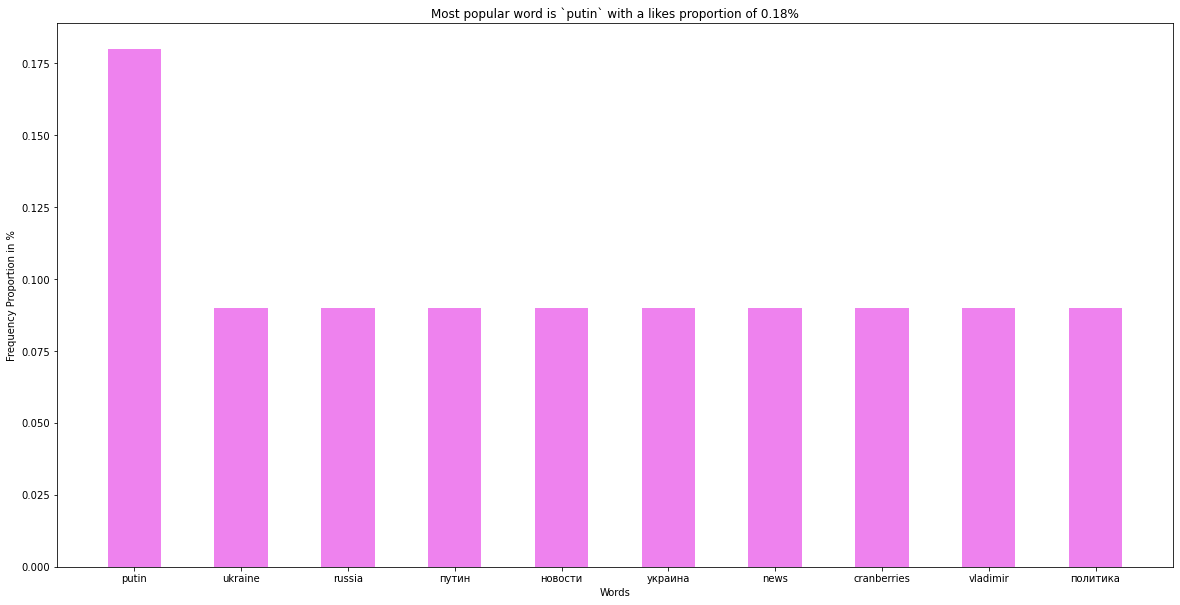

In [23]:
word_list = []
word_freq = []
word_dicti = {}
word_dist_dicti = {}
total_words = 0
max_occurence = 0
max_word = ''
for key in tag_list:
    sec_word_list = removeAllSplChars(key)
    sec_word_list = sec_word_list.lower()
    sec_word_list = sec_word_list.split(' ')
    for word in sec_word_list:
        if word in word_dicti:
            word_dicti[word] = word_dicti[word]+1
        else:
            word_dicti[word] = 1
        total_words=total_words+1
for word in word_dicti:
    word_dist_dicti[word] = round((word_dicti[word]/total_words),2)
    if max_occurence < word_dist_dicti[word]:
        max_occurence = word_dist_dicti[word]
        max_word = word
graph_title = f'Most popular word is `{max_word}` with a likes proportion of {max_occurence}%'
print(graph_title)
sort_words = sorted(word_dist_dicti.items(), key=lambda x: x[1], reverse=True)
word_list,word_freq = make_a_list(sort_words)
plot_the_list(x_list=word_list, y_list=word_freq, bar_color='violet',x_label='Words', y_label='Frequency Proportion in %', graph_title=graph_title)
#print(sort_words)

In [99]:
#Tags which attracted most number of views for the video

The tag which attracted most views is `top news` with a view proportion of 1.26%
How many results you want in graph? 10


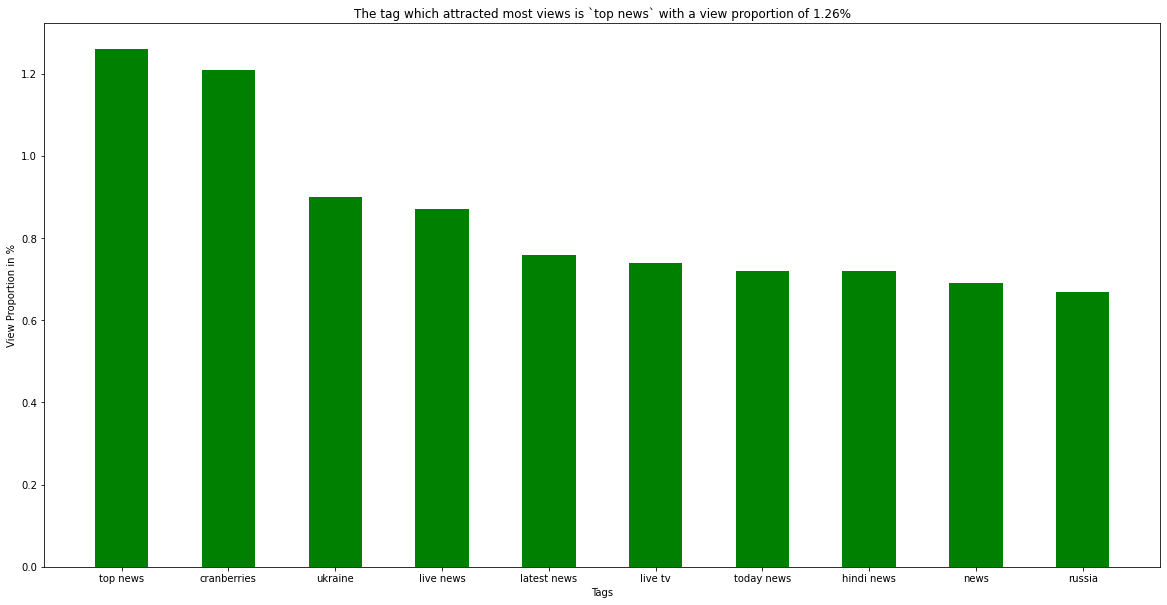

[('top news', 1.26), ('cranberries', 1.21), ('ukraine', 0.9), ('live news', 0.87), ('latest news', 0.76), ('live tv', 0.74), ('today news', 0.72), ('hindi news', 0.72), ('news', 0.69), ('russia', 0.67), ('aaj tak', 0.63), ('aajtak news', 0.63), ('aaj tak live', 0.63), ('live news and updates', 0.63), ('live news in hindi', 0.63), ('manish sisodia', 0.63), ('sudhir chaudhary show', 0.63), ('black and white', 0.63), ('black and white aaj tak', 0.63), ('highlights', 0.63), ('sudhir show', 0.63), ('aaj tak hindi news', 0.63), ('aaj tak news video', 0.63), ('aaj tak videos', 0.63), ('aajtak channel news', 0.63), ('news video', 0.63), ('breaking news in hindi', 0.63), ('aajtak', 0.63), ('aaj tak live news', 0.63), ('aaj tak news', 0.63), ('cyrus mistry death', 0.63), ('cyrus mistry', 0.63), ('rock', 0.61), ('the', 0.6), ('mercury', 0.6), ('island', 0.6), ('the cranberries', 0.6), ('the cranberries zombie', 0.6), ('zombie the cranberries', 0.6), ('cranberries zombie', 0.6), ('zombie cranberri

In [24]:
tag_list = []
tag_views = []
total_views = 0
max_views = 0
max_views_tag = ''
tag_dict_views = {}
tag_views_dist = {}
for idx,tags_list in enumerate(yt_data['videoTags']):    
    if tags_list[0] != 'NA':
        for tag in tags_list:
            tag = removeAllSplChars(tag)
            tag = tag.lower()
            if tag in tag_dict_views:
                tag = removeAllSplChars(tag)
                tag_dict_views[tag] = tag_dict_views[tag]+yt_data['videoViews'][idx]
            else:
                tag_dict_views[tag] = yt_data['videoViews'][idx]
            total_views = total_views+yt_data['videoViews'][idx]
for tag in tag_dict_views:
    tag_views_dist[tag] = round((tag_dict_views[tag]/total_views)*100, 2)
    if max_views < tag_views_dist[tag]:
        max_views = tag_views_dist[tag]
        max_views_tag=tag
tag_list = list(tag_dict_views.keys())
tag_views = list(tag_dict_views.values())
graph_title = f'The tag which attracted most views is `{max_views_tag}` with a view proportion of {max_views}%'
print(graph_title)
sort_views = sorted(tag_views_dist.items(), key=lambda x: x[1], reverse=True)
tag_list,tag_views = make_a_list(sort_views)
plot_the_list(x_list=tag_list, y_list=tag_views, bar_color='green',x_label='Tags', y_label='View Proportion in %', graph_title=graph_title)
print(sort_views)

In [54]:
#Tags which invited maximum engagement from viewers by the way of comments

The topic which attracted most engagement from viewers is `cranberries` with a view proportion of 0.23%
How many results you want in graph? 10


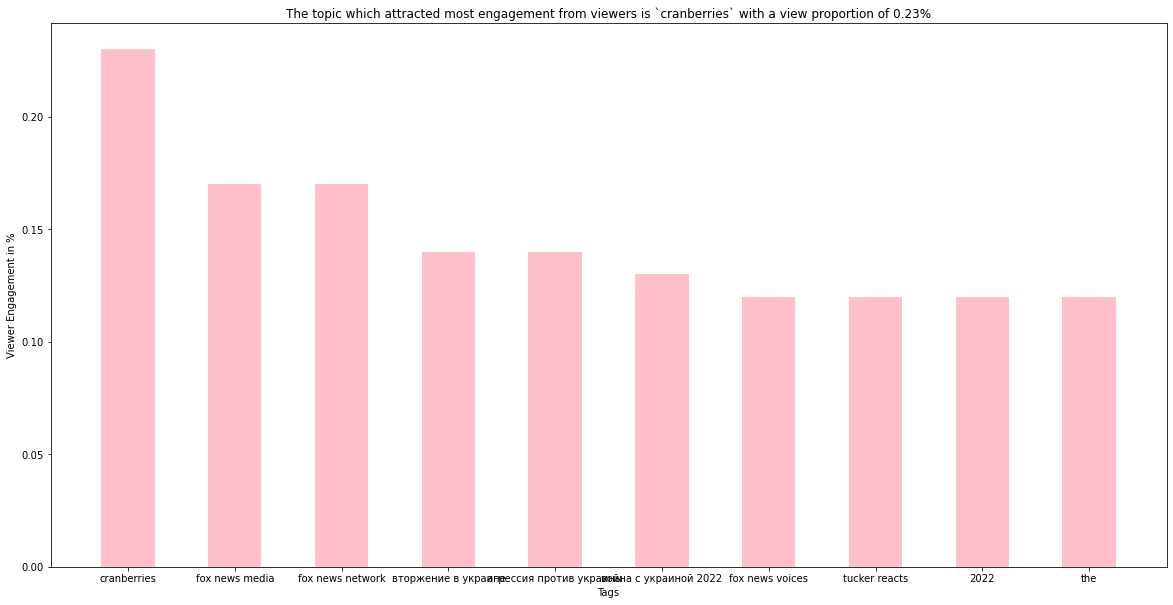

[('cranberries', 0.23), ('fox news media', 0.17), ('fox news network', 0.17), ('вторжение в украине', 0.14), ('агрессия против украины', 0.14), ('война с украиной 2022', 0.13), ('fox news voices', 0.12), ('tucker reacts', 0.12), ('2022', 0.12), ('the', 0.12), ('mercury', 0.12), ('island', 0.12), ('the cranberries', 0.12), ('the cranberries zombie', 0.12), ('zombie the cranberries', 0.12), ('cranberries zombie', 0.12), ('zombie cranberries', 0.12), ('dolores o’riordan', 0.12), ('dolores oriordan', 0.12), ('noel hogan', 0.12), ('fergal lawler', 0.12), ('zombie official music video', 0.12), ('zombie music video', 0.12), ('the cranberries music video', 0.12), ('cranberries music video', 0.12), ('irish rock band', 0.12), ('#zombietoabillion', 0.12), ('billion views', 0.12), ('videos with a billion views', 0.12), ('tucker carlson monologue', 0.11), ('tucker carlson monologue tonight', 0.11), ('tucker monologue', 0.11), ('tucker monologue tonight', 0.11), ('tucker tonight', 0.11), ('власть', 

In [25]:
tag_list = []
tag_comments = []
total_comments = 0
max_comments = 0
max_comments_tag = ''
tag_dict_comments = {}
tag_comments_dist = {}
for idx,tags_list in enumerate(yt_data['videoTags']):    
    if tags_list[0] != 'NA':
        for tag in tags_list:
            if tag in tag_dict_comments:
                tag_dict_comments[tag.lower()] = tag_dict_comments[tag]+yt_data['videoComments'][idx]
            else:
                tag_dict_comments[tag.lower()] = yt_data['videoComments'][idx]
            total_comments = total_comments+yt_data['videoComments'][idx]
for tag in tag_dict_comments:
    tag_comments_dist[tag.lower()] = round((tag_dict_comments[tag.lower()]/total_comments)*100, 2)
    if max_comments < tag_comments_dist[tag.lower()]:
        max_comments = tag_comments_dist[tag.lower()]
        max_comments_tag = tag.lower()
tag_list = list(tag_dict_comments.keys())
tag_comments = list(tag_dict_comments.values())
graph_title = f'The topic which attracted most engagement from viewers is `{max_comments_tag}` with a view proportion of {max_comments}%'
print(graph_title)
sort_comments = sorted(tag_comments_dist.items(), key=lambda x: x[1], reverse=True)
tag_list,tag_comments = make_a_list(sort_comments)
plot_the_list(x_list=tag_list, y_list=tag_comments, bar_color='pink',x_label='Tags', y_label='Viewer Engagement in %', graph_title=graph_title)
print(sort_comments)

In [38]:
#Most views from which language video

The language which attracted most views is `hi` with a view proportion of 37.07%
How many results you want in graph? 10


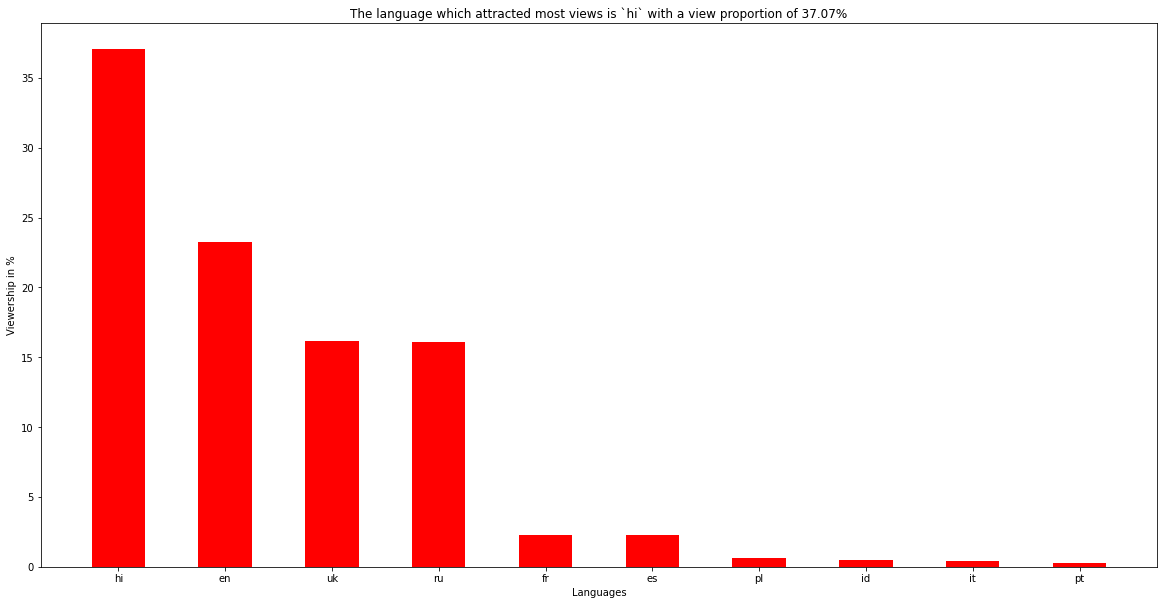

[('hi', 37.07), ('en', 23.28), ('uk', 16.14), ('ru', 16.13), ('fr', 2.31), ('es', 2.25), ('pl', 0.66), ('id', 0.49), ('it', 0.43), ('pt', 0.3), ('th', 0.19), ('de', 0.16), ('ro', 0.15), ('tr', 0.1), ('ur', 0.08), ('bn', 0.04), ('rw', 0.03), ('sr', 0.03), ('bg', 0.02), ('kk', 0.02), ('fi', 0.02), ('cs', 0.01), ('lt', 0.01), ('sv', 0.01), ('az', 0.01), ('zh', 0.01), ('ja', 0.01), ('ar', 0.01), ('ms', 0.01), ('lv', 0.01), ('rn', 0.0), ('ne', 0.0), ('ht', 0.0), ('af', 0.0), ('ps', 0.0), ('ko', 0.0), ('pa', 0.0), ('ha', 0.0), ('mo', 0.0), ('te', 0.0), ('sk', 0.0), ('vi', 0.0), ('so', 0.0), ('el', 0.0), ('ti', 0.0), ('mr', 0.0), ('sw', 0.0), ('bs', 0.0)]


In [26]:
lang_list = []
lang_views = []
total_views = 0
max_views = 0
max_views_lang = ''
lang_dict_views = {}
lang_views_dist = {}
for idx,lang in enumerate(yt_data['videoLanguage']):
    if lang != 'NA':
        if lang in lang_dict_views:
            lang_dict_views[lang] = lang_dict_views[lang]+yt_data['videoViews'][idx]
        else:
            lang_dict_views[lang] = yt_data['videoViews'][idx]
        total_views = total_views+yt_data['videoViews'][idx]
for lang in lang_dict_views:
    lang_views_dist[lang] = round((lang_dict_views[lang]/total_views)*100, 2)
    if max_views < lang_views_dist[lang]:
        max_views = lang_views_dist[lang]
        max_views_lang=lang
lang_list = list(lang_dict_views.keys())
lang_views = list(lang_dict_views.values())
graph_title=f'The language which attracted most views is `{max_views_lang}` with a view proportion of {max_views}%'
print(graph_title)
sort_views = sorted(lang_views_dist.items(), key=lambda x: x[1], reverse=True)
lang_list,lang_views = make_a_list(sort_views)
plot_the_list(x_list=lang_list, y_list=lang_views, bar_color='red',x_label='Languages', y_label='Viewership in %', graph_title=graph_title)
print(sort_views)

In [1]:
#Most number of videos are from which country?

The videos originated from UA the most with a proportion of 21.89%.
How many results you want in graph? 10


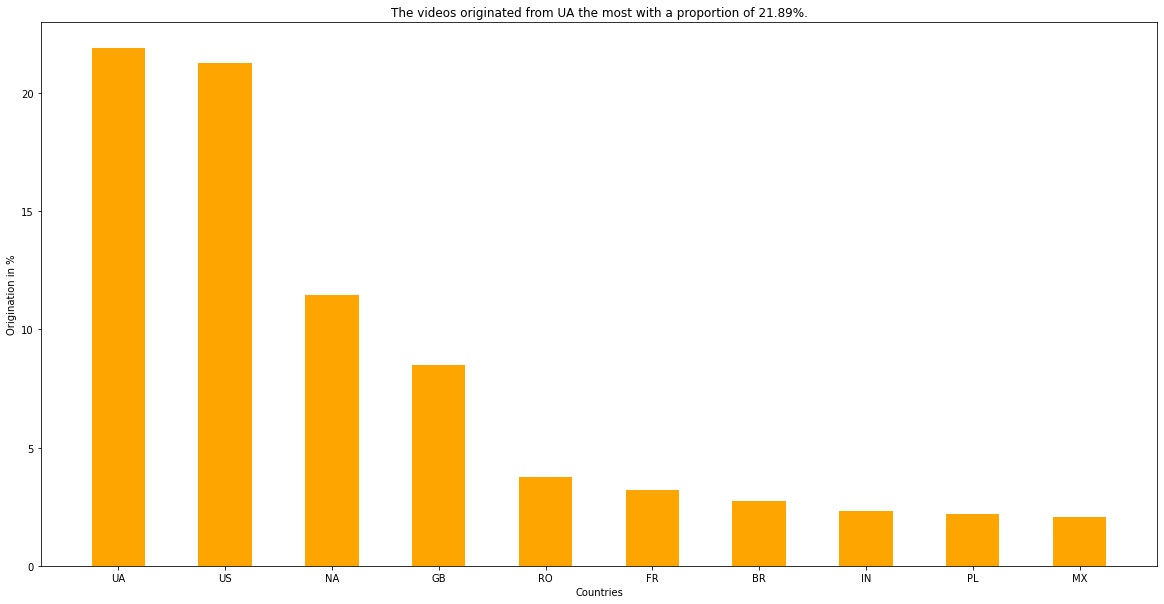

[('UA', 21.89), ('US', 21.24), ('NA', 11.43), ('GB', 8.49), ('RO', 3.77), ('FR', 3.22), ('BR', 2.74), ('IN', 2.33), ('PL', 2.2), ('MX', 2.07), ('IT', 1.88), ('RU', 1.87), ('PH', 1.58), ('ES', 1.4), ('DE', 1.4), ('PE', 0.84), ('TZ', 0.81), ('ID', 0.71), ('NG', 0.63), ('KE', 0.58), ('UG', 0.54), ('AU', 0.47), ('AZ', 0.45), ('CA', 0.44), ('GR', 0.42), ('RW', 0.4), ('CZ', 0.38), ('LT', 0.37), ('PK', 0.32), ('VN', 0.29), ('ZA', 0.27), ('RS', 0.26), ('CO', 0.25), ('SE', 0.21), ('CH', 0.2), ('ZW', 0.2), ('BE', 0.2), ('BG', 0.2), ('LK', 0.15), ('MY', 0.14), ('AR', 0.14), ('TR', 0.12), ('NO', 0.12), ('BY', 0.12), ('IL', 0.12), ('DO', 0.12), ('AT', 0.12), ('KZ', 0.1), ('BO', 0.1), ('CN', 0.1), ('NL', 0.09), ('JP', 0.08), ('NZ', 0.07), ('BA', 0.07), ('SK', 0.07), ('BV', 0.07), ('LV', 0.07), ('PT', 0.06), ('TH', 0.06), ('CL', 0.06), ('IE', 0.05), ('SV', 0.05), ('PR', 0.05), ('SI', 0.04), ('NP', 0.04), ('FI', 0.04), ('GE', 0.04), ('JM', 0.04), ('QA', 0.04), ('AE', 0.03), ('NI', 0.03), ('DZ', 0.03),

In [27]:
channelid_cnt = {}
for idx in yt_data.index:
    if yt_data['channelId'][idx] in channelid_cnt:
        channelid_cnt[yt_data['channelId'][idx]] = channelid_cnt[yt_data['channelId'][idx]] + yt_data['count'][idx]
    else:
        channelid_cnt[yt_data['channelId'][idx]] = yt_data['count'][idx]
#print(channelid_cnt)
channel_cntry = {}
channel_list = yt_channel_data['channelIds'].tolist()
total_cntry = 0
max_cntry_dist = 0
max_cntry = ''
for channelID in channelid_cnt:
    if channelID in channel_list:
        c_index = channel_list.index(channelID)
        #print(yt_channel_data['channelCountry'][c_index])
        if yt_channel_data['channelCountry'][c_index] in channel_cntry:
            channel_cntry[yt_channel_data['channelCountry'][c_index]] = channel_cntry[yt_channel_data['channelCountry'][c_index]]+channelid_cnt[channelID]
        else:
            channel_cntry[yt_channel_data['channelCountry'][c_index]] = channelid_cnt[channelID]
        total_cntry = total_cntry+channelid_cnt[channelID]
#print(channel_cntry)
for cntry in channel_cntry:
    channel_cntry[cntry] = round((channel_cntry[cntry]/total_cntry)*100, 2)
    if max_cntry_dist < channel_cntry[cntry]:
        max_cntry_dist = channel_cntry[cntry]
        max_cntry=cntry
sort_cntry = sorted(channel_cntry.items(), key=lambda x: x[1], reverse=True)
graph_title = f'The videos originated from {max_cntry} the most with a proportion of {max_cntry_dist}%.'
print(graph_title)
cntry_list,video_dist = make_a_list(sort_cntry)
plot_the_list(x_list=cntry_list, y_list=video_dist, bar_color='orange',x_label='Countries', y_label='Origination in %', graph_title=graph_title)
print(sort_cntry)

In [30]:
print('Dataframe Describe:',yt_data.describe())
print('Dataframe Shape:',yt_data.shape)

Dataframe Describe:              count     videoTime    videoViews    videoLikes  videoComments
count  10000.00000  1.000000e+04  1.000000e+04  1.000000e+04   10000.000000
mean      40.20510  1.153484e+04  9.857817e+05  1.341871e+04    1407.341600
std      159.80433  4.591343e+05  2.167589e+07  9.251810e+04    5278.229344
min       17.00000  0.000000e+00  0.000000e+00  0.000000e+00       0.000000
25%       21.00000  7.100000e+01  6.575000e+01  1.000000e+00       0.000000
50%       28.00000  3.940000e+02  9.001000e+03  2.240000e+02      27.000000
75%       41.00000  9.912500e+02  1.543888e+05  9.171500e+03     902.250000
max    15423.00000  3.559096e+07  1.306202e+09  6.675428e+06  305293.000000
Dataframe Shape: (10000, 13)


In [31]:
print('Dataframe Describe:',yt_channel_data.describe())
print('Dataframe Shape:',yt_channel_data.shape)

Dataframe Describe:         subscribers  channelViews     videoCount
count  2.970000e+03  2.970000e+03    2970.000000
mean   4.770922e+05  2.100295e+08    4359.113131
std    2.044999e+06  9.968486e+08   20035.588654
min    0.000000e+00  0.000000e+00       0.000000
25%    1.390000e+03  1.431388e+05      80.000000
50%    1.700000e+04  2.580481e+06     268.000000
75%    2.027500e+05  4.011854e+07    1063.750000
max    5.330000e+07  2.071943e+10  385437.000000
Dataframe Shape: (2970, 8)


In [31]:
#Time given for each tag/topic

Stats needed in days or hours or minutes seconds?years
Time worth `1.8` year/s was given on the topic `новости`
How many results you want in graph? 10


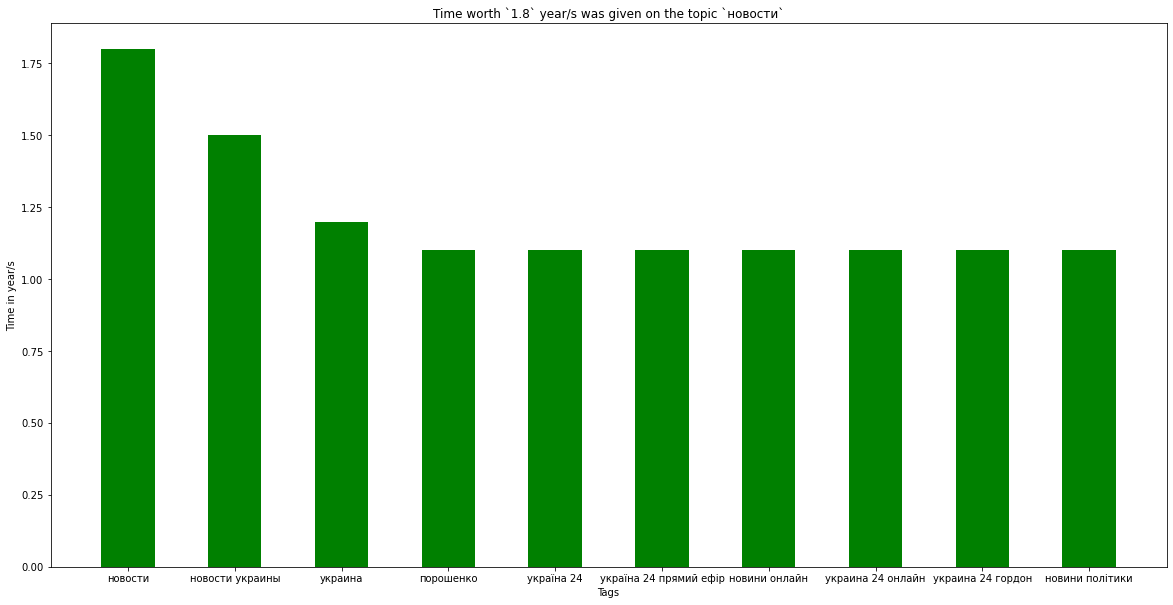

[('новости', 1.8), ('новости украины', 1.5), ('украина', 1.2), ('порошенко', 1.1), ('україна 24', 1.1), ('україна 24 прямий ефір', 1.1), ('новини онлайн', 1.1), ('украина 24 онлайн', 1.1), ('украина 24 гордон', 1.1), ('новини політики', 1.1), ('україна 24 трансляція онлайн', 1.1), ('україна 24 наживо', 1.1), ('новини онлайн прямий ефір', 1.1), ('україна 24 онлайн', 1.1), ('україна 24 новини', 1.1), ('новости сегодня', 1.1), ('полуев', 1.1), ('гордон голованов', 1.1), ('украина 24 прямой эфир', 1.1), ('україна 24 прямий єфір', 1.1), ('украина 24 смотреть', 1.1), ('украина 24 видео', 1.1), ('новости украины сегодня', 1.1), ('голованов украина 24', 1.1), ('зеленский ютуб', 1.1), ('новости сейчас', 1.1), ('марафон', 1.1), ('news', 1.0), ('breaking news', 1.0), ('rt', 0.7), ('world news', 0.7), ('current events', 0.7), ('russia today', 0.7), ('happening now', 0.7), ('putin live', 0.7), ('rt news', 0.7), ('urgent', 0.7), ('news live', 0.6), ('ictv', 0.4), ('телеканал ictv', 0.4), ('ictv онла

In [28]:
time_type = input('Stats needed in days or hours or minutes seconds?')
div = 1
suff = 's'
if time_type.lower() == 'days':
    div = 86400
    suff = 'day/s'
elif time_type.lower() == 'years':
    div = 31536000
    suff = 'year/s'
elif time_type.lower() == 'hours':
    div = 3600
    suff = 'hour/s'
elif time_type.lower() == 'minutes':
    div = 60
    suff = 'min/s'
else:
    div = 1
tag_list = []
tag_times = []
total_time = 0
max_time = 0
max_time_tag = ''
tag_dict_times = {}
for idx,tags_list in enumerate(yt_data['videoTags']):    
    if tags_list[0] != 'NA':
        for tag in tags_list:
            tag = removeAllSplChars(tag)
            tag = tag.lower()
            if tag in tag_dict_times:
                tag_dict_times[tag] = tag_dict_times[tag]+yt_data['videoTime'][idx]
            else:
                tag_dict_times[tag] = yt_data['videoTime'][idx]
            total_time = total_time+yt_data['videoTime'][idx]
for tag in tag_dict_times:
    tag_dict_times[tag] = round(tag_dict_times[tag]/div,1)
for tag in tag_dict_times:
    if max_time < tag_dict_times[tag]:
        max_time = tag_dict_times[tag]
        max_time_tag=tag
#tag_list = list(tag_dict_views.keys())
#tag_views = list(tag_dict_views.values())
graph_title = f'Time worth `{tag_dict_times[max_time_tag]}` {suff} was given on the topic `{max_time_tag}`'
print(graph_title)
sort_times = sorted(tag_dict_times.items(), key=lambda x: x[1], reverse=True)
tag_list,tag_times = make_a_list(sort_times)
plot_the_list(x_list=tag_list, y_list=tag_times, bar_color='green',x_label='Tags', y_label=f'Time in {suff}', graph_title=graph_title)
print(sort_times)

For this one, we assume that viewers have watched complete videos.
Stats needed in years, days or hours or minutes seconds?years
Topic/Tag `news` attracted a watch time of `45.7 year/s`
How many results you want in graph? 10


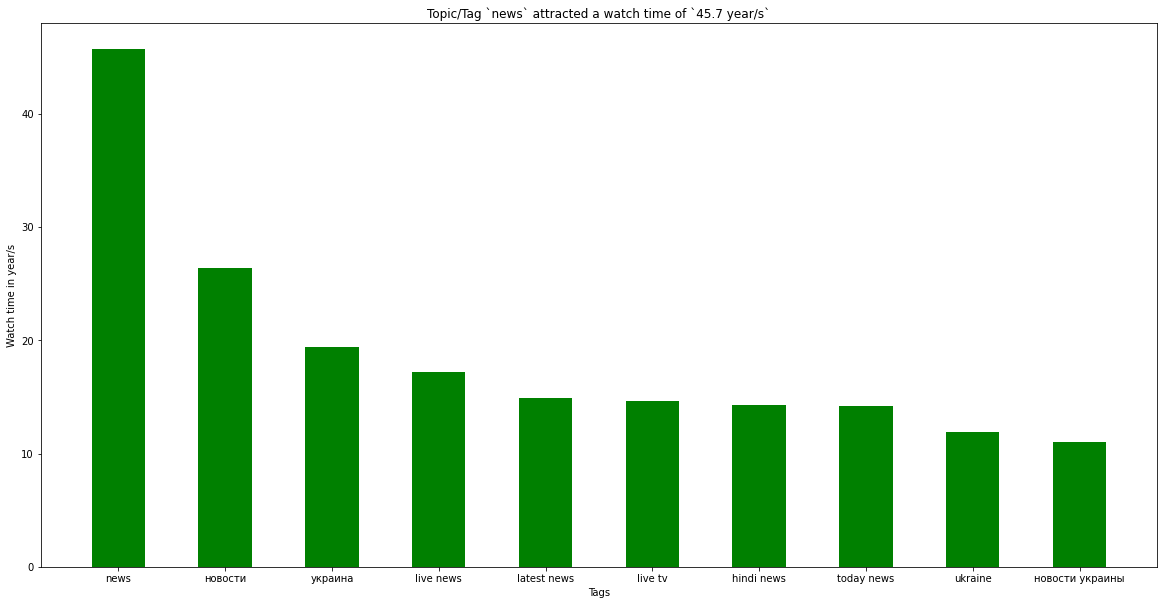

In [29]:
print('For this one, we assume that viewers have watched complete videos.')
time_type = input('Stats needed in years, days or hours or minutes seconds?')
div = 1
suff = 's'
if time_type.lower() == 'days':
    div = 86400
    suff = 'day/s'
elif time_type.lower() == 'years':
    div = 31536000
    suff = 'year/s'
elif time_type.lower() == 'hours':
    div = 3600
    suff = 'hour/s'
elif time_type.lower() == 'minutes':
    div = 60
    suff = 'min/s'
else:
    div = 1
tag_wtime_dict = {}
tag_list = list(tag_dict_views.keys())
for tag in tag_list:
    if tag_dict_views[tag] != 0:
        tag_wtime_dict[tag] = (tag_dict_views[tag]*tag_dict_times[tag])
for tag in tag_wtime_dict:
    tag_wtime_dict[tag] = round(tag_wtime_dict[tag]/div,1)
#print(tag_wtime_dict) 
sort_wtimes = sorted(tag_wtime_dict.items(), key=lambda x: x[1], reverse=True)
# People have watched this topic for:
graph_title = f'Topic/Tag `{sort_wtimes[0][0]}` attracted a watch time of `{sort_wtimes[0][1]} {suff}`'
print(graph_title)
tag_list,tag_wtimes = make_a_list(sort_wtimes)
plot_the_list(x_list=tag_list, y_list=tag_wtimes, bar_color='green',x_label='Tags', y_label=f'Watch time in {suff}', graph_title=graph_title)
#print(sort_wtimes)